#### Lag and shift

In [1]:
import pandas as pd

In [2]:
tseries = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
tseries.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [42]:
#tseries
intermediate = pd.DataFrame(tseries.values)
intermediate.head()

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [47]:
#intermediate
rolling = intermediate.rolling(3)
rolling

Rolling [window=3,center=False,axis=0,method=single]

In [48]:
intermediate.head(10)

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
5,15.8
6,15.8
7,17.4
8,21.8
9,20.0


In [49]:
rolling.min().head(10)

,0
0,NaN
1,NaN
2,17.9
3,14.6
4,14.6
5,14.6
6,15.8
7,15.8
8,15.8
9,17.4


In [7]:
window = intermediate.expanding()

In [8]:
window

Expanding [min_periods=1,center=False,axis=0,method=single]

In [51]:
intermediate.head(10)

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
5,15.8
6,15.8
7,17.4
8,21.8
9,20.0


In [52]:
window.min().head(10)

,0
0,20.7
1,17.9
2,17.9
3,14.6
4,14.6
5,14.6
6,14.6
7,14.6
8,14.6
9,14.6


In [11]:
intermediate

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
...,...
3645,14.0
3646,13.6
3647,13.5
3648,15.7


In [56]:
intermediate.shift(1)

,0
0,NaN
1,20.7
2,17.9
3,18.8
4,14.6
...,...
3645,14.6
3646,14.0
3647,13.6
3648,13.5


In [58]:
pd.concat([intermediate.shift(0),intermediate.shift(1)], axis=1)

,0,0
0,20.7,NaN
1,17.9,20.7
2,18.8,17.9
3,14.6,18.8
4,15.8,14.6
...,...,...
3645,14.0,14.6
3646,13.6,14.0
3647,13.5,13.6
3648,15.7,13.5


In [13]:

rolling = intermediate.rolling(3)
window = intermediate.expanding()
df = pd.concat([window.min(), window.mean(), window.max(), intermediate.shift(-1),
                      rolling.min(), rolling.mean(), rolling.max()], axis=1)
df.columns = ['min', 'mean', 'max', 't+1', 'min_roll', 'mean_roll', 'max_roll']


In [14]:
df.head()

,min,mean,max,t+1,min_roll,mean_roll,max_roll
0,20.7,20.700000,20.7,17.9,NaN,NaN,NaN
1,17.9,19.300000,20.7,18.8,NaN,NaN,NaN
2,17.9,19.133333,20.7,14.6,17.9,19.133333,20.7
3,14.6,18.000000,20.7,15.8,14.6,17.100000,18.8
4,14.6,17.560000,20.7,15.8,14.6,16.400000,18.8


In [15]:
tseries.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [16]:
df.head()

,min,mean,max,t+1,min_roll,mean_roll,max_roll
0,20.7,20.700000,20.7,17.9,NaN,NaN,NaN
1,17.9,19.300000,20.7,18.8,NaN,NaN,NaN
2,17.9,19.133333,20.7,14.6,17.9,19.133333,20.7
3,14.6,18.000000,20.7,15.8,14.6,17.100000,18.8
4,14.6,17.560000,20.7,15.8,14.6,16.400000,18.8


#### Dickey Fuller Test

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from statsmodels.tsa.stattools import adfuller
df=pd.read_csv("Temperature_csv1.csv")

In [19]:
df.head()

,Unnamed: 0,AverageTemperature
0,1920-01-01,20.683
1,1919-12-31,16.879
2,1919-12-30,9.787
3,1919-12-29,3.184
4,1919-12-28,-2.781


In [20]:
df.columns = ['time','AverageTemperature']


In [21]:
df['time'] = pd.to_datetime(df.time, format= "%Y-%m-%d")
df = df.sort_values(['time'], ascending=False)

In [22]:
df1 = df.set_index('time')

In [23]:
df1.shape

(2127, 1)

In [24]:
df1.head()

,AverageTemperature
time,
1920-01-01,20.683
1919-12-31,16.879
1919-12-30,9.787
1919-12-29,3.184
1919-12-28,-2.781


In [25]:
df1.index.duplicated().sum()

0

In [26]:
df1.isnull().sum()

AverageTemperature    0
dtype: int64

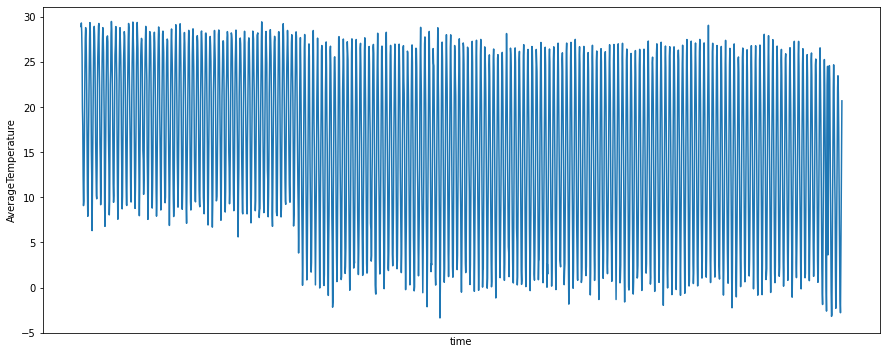

In [27]:
fig=plt.figure(figsize=(15,6))
sns.lineplot(data=df1,x='time',y='AverageTemperature')
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

In [28]:
df1.isnull().sum()

AverageTemperature    0
dtype: int64

In [29]:
## Dickey fuller test
result = adfuller(df1['AverageTemperature'])

In [30]:
result

(-0.9389469070545453,
 0.7748763052215997,
 26,
 2100,
 {'1%': -3.43346776730731,
  '5%': -2.8629172977475434,
  '10%': -2.567503208390023},
 7129.040078832528)

In [31]:
def printit(result):
    print('Test Statistic: %f' %result[0])
    print('p-value: %f' %result[1])
    print('Critical values:')
    for key, value in result[4].items ():
         print('\t%s: %.3f' %(key, value))

In [32]:
printit(result)

Test Statistic: -0.938947
p-value: 0.774876
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.568


In [33]:
df1.head()

,AverageTemperature
time,
1920-01-01,20.683
1919-12-31,16.879
1919-12-30,9.787
1919-12-29,3.184
1919-12-28,-2.781


In [61]:
pd.concat([df1['AverageTemperature'].shift(0),
           df1['AverageTemperature'].shift(1), 
          df1['AverageTemperature'].shift(0) - df1['AverageTemperature'].shift(1)], axis=1).head()

,AverageTemperature,AverageTemperature,AverageTemperature
time,,,
1920-01-01,20.683,NaN,NaN
1919-12-31,16.879,20.683,-3.804
1919-12-30,9.787,16.879,-7.092
1919-12-29,3.184,9.787,-6.603
1919-12-28,-2.781,3.184,-5.965


In [62]:
## lag
df1.diff().head()

,AverageTemperature
time,
1920-01-01,NaN
1919-12-31,-3.804
1919-12-30,-7.092
1919-12-29,-6.603
1919-12-28,-5.965


In [35]:
df_diff = df1.diff().dropna()

In [36]:
df_diff.head()

,AverageTemperature
time,
1919-12-31,-3.804
1919-12-30,-7.092
1919-12-29,-6.603
1919-12-28,-5.965
1919-12-27,1.377


In [37]:
result=adfuller(df_diff)

In [38]:
printit(result)

Test Statistic: -16.424601
p-value: 0.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.568


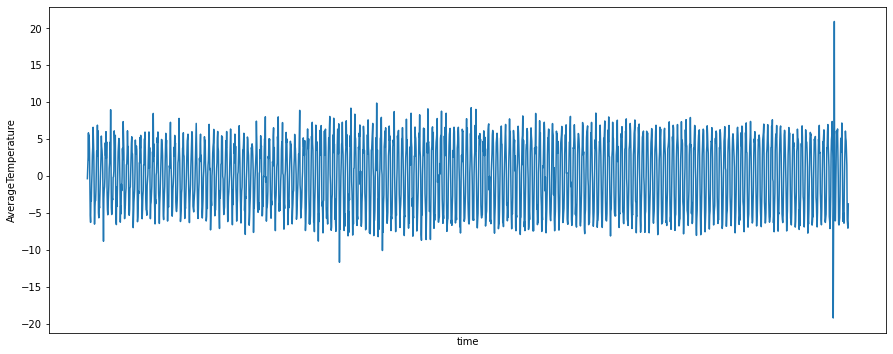

In [39]:
fig=plt.figure(figsize=(15,6))
sns.lineplot(data=df_diff,x='time',y='AverageTemperature')
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

### Forecasting

In [40]:
# !pip install pycaret

In [41]:
import pycaret
import pandas as pd
import datetime
from pycaret.time_series import TSForecastingExperiment
from sktime.forecasting.base import ForecastingHorizon

ImportError: cannot import name 'BlockwiseDep' from 'dask.blockwise' (C:\Users\Jayanti\Anaconda3\lib\site-packages\dask\blockwise.py)

Dask dataframe requirements are not installed.

Please either conda or pip install as follows:

  conda install dask                     # either conda install
  pip install dask[dataframe] --upgrade  # or pip install

### Reading Inputs

In [ ]:
train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

In [ ]:
#train.tail()

#### Processing the Inputs
###### Note we need to drop extra information provided here (which can't be used in test)
###### Only date and segment can be used as inputs rest should be dropped

In [ ]:
train = train.assign(application_date = pd.to_datetime(train.application_date, format="%Y-%m-%d"))

In [ ]:
#test = test.assign(application_date = pd.to_datetime(test.application_date, format="%Y-%m-%d"))

In [ ]:
train.application_date.min(), train.application_date.max()

In [ ]:
#test.application_date.min(), test.application_date.max()

##### Checking the types and range of data

In [ ]:
train.dtypes

* There are couple of options here to solve this problem one way is to manually create features
then use those features in xgboost model etc
* The other option to use ARIMA or ESM and try to see if those work well with assumptions on ARIMA
* Finally the last option which we are taking is to use pycaret which does feature engineering on its own and give us the result for many different algorithms
* We would be choosing the last option as it covers the above two options

In [ ]:
### we have already imported pycaret
### pycaret has two API -> functional as well as oop
### We will choose oop to solve our problem, note functional 
### would make more sense if you are new to programming

In [ ]:
train = train.set_index('application_date')

In [ ]:
#train_march.head()
train.filter(['case_count']).plot()

**Initialise the TSForecastingExperiment**

In [ ]:
exp = TSForecastingExperiment()

In [ ]:
type(exp)

**Check for Forecasting missing values for both dates and case count**

In [ ]:
train.case_count.isnull().sum()

In [ ]:
train.index.isnull().sum()

In [ ]:
train.shape

In [ ]:
#setup()

In [ ]:
exp.setup(train.filter(['case_count']), 
          fh= 120, session_id = 123, 
          target='case_count')

check_stats gives info on summary of data along with test of white noise with values of p values and test statistic
It also gives information on distribution of data if it has normality or not

In [ ]:
exp.check_stats()


In [ ]:
exp.models()

In [ ]:
pycaret.__version__

In [ ]:
model_arima = exp.create_model('auto_arima') # huber_cds_dt
model_arima

In [ ]:
print(model_arima.cutoff)

In [ ]:
model_arima.get_fitted_params()

In [ ]:
#statsmodel, pmdarima, sktime, sklearn...

In [ ]:
#dir(model_arima)

In [ ]:
type(model_arima._forecaster)

In [ ]:
dir(model_arima)
dir(model_arima._forecaster)
model_arima._forecaster.summary()

pycaret is very complex and has many interfaces binded together it uses statsmodel, sktime etc and bind them together to make this pacakge
work, however because of this different implementation applied to common package, it gives a one code to make it work different algorithm,
the drawback is that some of things which works in statsmodel might not work/compatible with sktime, you can explore it using the ._forecast and other
related methods/attributes given at user level and hence it makes sometime difficult to intutively understand what could pycaret would do

You can check this by running type command, for example: type(model_ets._forecaster) will give you that it is coming from statsmodel
whereas type(model_arima._forecaster) will give you info that it is coming from pmdarima, similarly a complex model like lr_cds_dt is coming from sktime by typing type(newbest._forecaster) 

In [ ]:

#help(model_exp._forecaster)

In [ ]:
model_exp = exp.create_model('exp_smooth', seasonal='mul', sp=28, trend='mul') # huber_cds_dt
model_exp

In [ ]:
exp.predict_model(model_exp)

In [ ]:
model_ets = exp.create_model('ets', trend='mul') # huber_cds_dt
model_ets

In [ ]:
type(model_ets)

In [ ]:
type(model_exp)

In [ ]:
type(model_ets._forecaster)

In [ ]:
dir(model_ets._forecaster)
model_ets._forecaster

In case you use a model and don't wish to run comapre_models then proably it is a good idea to tune it , one 
can use exp.tune_model(model) with model earlier trained

In [ ]:
exp.predict_model(model_ets)

In [ ]:
train.tail(120)

In [ ]:
# tune_model = exp.tune_model(model)
# tune_model
# exp.plot_model(tune_model)

To compare many mondels at once, one can use exp.compare_models and pick the one that best suits your needs
The matrix will give you all information regarding validation metrics to make that decision

In [ ]:
best = exp.compare_models()

In [ ]:
best

In [ ]:
newbest = exp.create_model('lr_cds_dt', return_train_score=True)

In [ ]:
newbest

In [ ]:
type(newbest._forecaster)

In [ ]:
newbest._predict()

In [ ]:
newbest._forecaster

In [ ]:
type(best._forecaster)

In [ ]:
train.index[-1], train.index[0]

In [ ]:
best._forecaster.named_steps.keys()

In [ ]:
exp.plot_model(best)

In [ ]:
predictions = exp.predict_model(best)

In [ ]:
predictions.head()

#### These won't work for this model but for supported model it would work

In [ ]:
exp.plot_model(best,plot = 'acf')

exp.plot_model(best, plot = 'diagnostics')

# Decomposition plot
exp.plot_model(best, plot = 'decomp_stl')

exp.plot_model(best, 'insample')

exp.plot_model(best, plot = 'residuals')

In [ ]:
exp.plot_model( best, data_kwargs = {'fh' : 120})

### Saving the model

In [ ]:
exp.save_model(best, 'best_cdsDtForecaster')

#### Loading the model

In [ ]:
newbest = exp.load_model('best_cdsDtForecaster')

In [ ]:
exp.plot_model(newbest)

In [ ]:
predict_holdout = exp.predict_model(model_arima, fh=120)

In [ ]:
predict_holdout.head()

In [ ]:
predictions = exp.predict_model(best, fh=120)

In [ ]:
predictions.head()

A very important note that pycaret can solve problems having exogenous variable as input apart from datetime and continous predictions

#### The below is written by Moez Ali (Developer of Pycaret)
Some very important point with respect to open source functionalities, they are never constant

Version 1.0 of PyCaret in Apr 2020, compare_models function was comparing all the models in the library to return the averaged 
cross-validated performance metrics. Based on which you would use create_model to train the best performing model and get 
the trained model output that you can use for predictions.
This behavior was later changed in version 2.0. compare_models now returns the best model based on the n_select
parameter which by default is set to 1 which means that it will return the best model (by default).

By changing the default n_select parameter to 3, you can get a list of top 3 models

The returned objects are trained models, you really don’t need to call create_model again to train them. You can use these models to generate diagnostic plots or to even use them for predictions

The sklearn algorithm can be used with pycaret (create_model function also accepts untrained model object in addition to the ID’s of models available in the model library. As long as your object is compatible with scikit-learn fit/predict API)
                                         

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

### An example with exogenous variable and Arima

In [ ]:
import pandas as pd
from pycaret.time_series import TSForecastingExperiment
#import numpy as np
#from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
#from pycaret.datasets import get_data
#from sktime.transformations.series.summarize import WindowSummarizer

In [ ]:
data = pd.read_csv('timeseries_exo.csv', index_col=0)

In [ ]:
data.head()

In [ ]:
#data.index = pd.to_datetime(data.index, format = "%Y-%m-%d")

In [ ]:
FH = 12
target = "Consumption"
data_for_modeling = data
#data_for_modeling = data.iloc[:-FH]
#future_data = data.iloc[-FH:]
#future_exog = future_data.drop(columns=target)

In [ ]:
print(data_for_modeling.shape) #future_exog.shape)

In [ ]:
data.head()

In [ ]:
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')

In [ ]:

#### Setup Experiment ----
exp = TSForecastingExperiment()
exp.setup(
    data=data_for_modeling, target=target, 
    fh=FH, seasonal_period=4, session_id=42
)


In [ ]:

#### Baseline Model ----
model = exp.create_model("auto_arima") ## you can choose arima as well
preds = exp.predict_model(model)
exp.plot_model(model)



In [ ]:
future_preds = exp.predict_model(model)

In [ ]:
data_for_modeling.tail(20)

In [ ]:
print(future_preds)


In [ ]:
exp.plot_model(model) 

In [ ]:
#help(exp.plot_model)

In [ ]:
exp.plot_model(model,plot = 'pacf')


In [ ]:
exp.plot_model(model,plot = 'acf')

In [ ]:
# from matplotlib import pyplot as plt
# plt.figure(figsize= (30, 20))

In [ ]:
exp.plot_model(model, plot = 'diagnostics')

In [ ]:
# Decomposition plot
exp.plot_model(model, plot = 'decomp_stl')



In [ ]:
exp.plot_model(model, 'insample')

In [ ]:
exp.plot_model(model, plot = 'residuals')



In [ ]:
## ETS
## It can't be performed because of exogenous variable

##### A better Solution can be done using compare_models()

In [ ]:
#### Setup Experiment ----
exp = TSForecastingExperiment()
exp.setup(
    data=data_for_modeling, target=target, fh=FH, seasonal_period=4, session_id=42
)


In [ ]:
exp.models()

In [ ]:

#### Baseline Model ----
model = exp.compare_models() ## you can choose arima as well
preds = exp.predict_model(model)
exp.plot_model(model)



In [ ]:
#exp.pull(model)

In [ ]:
#### Tune Model ----
tuned_model = exp.tune_model(model)
exp.predict_model(tuned_model)
exp.plot_model(tuned_model)


In [ ]:
#exp.pull(tuned_model)

In [ ]:
#help(exp.predict_model)

In [ ]:
#### Finalize Model ----
final_model = exp.finalize_model(tuned_model)

In [ ]:
exp.predict_model(final_model,fh=12, X=data_for_modeling)

In [ ]:
data.sort_index().tail(12)

In [ ]:
print(future_preds)


In [ ]:
#exp.plot_model(final_model)  # Uses test split from before finalizing as future exogenous values
exp.plot_model(final_model, data_kwargs={'X': future_exog}) # Uses provided X_test values

In [ ]:
#help(exp.plot_model)

In [ ]:
exp.plot_model(final_model,plot = 'pacf')


In [ ]:
exp.plot_model(final_model,plot = 'acf')

In [ ]:
# from matplotlib import pyplot as plt
# plt.figure(figsize= (30, 20))

In [ ]:
exp.plot_model(final_model, plot = 'diagnostics')

In [ ]:
# Decomposition plot
exp.plot_model(final_model, plot = 'decomp_stl')



In [ ]:
exp.plot_model(final_model, 'insample')



In [ ]:
exp.plot_model(final_model, plot = 'residuals')



In practice, the smoothing parameter is often chosen by a grid search of the parameter space; that is, different solutions for α are tried starting, for example, with α = 0.1 to α = 0.9, with increments of 0.1. Then α is chosen so as to produce the smallest sums of squares (or mean squares) for the residuals (i.e., observed values minus one-step-ahead forecasts; this mean squared error is also referred to as ex post mean squared error, ex post MSE for short).